## 1. Introduction to the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

columns_names = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
cars = pd.read_csv('imports-85.data',names = columns_names)
rs = 1

In [2]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [3]:
#Identificação das colunas numéricas
numeric_cols = cars.select_dtypes(include = ['int64','float64']).columns.values

#Removendo a coluna symboling, que é uma espécie de index, e não uma feature
numeric_cols = numeric_cols[numeric_cols != 'symboling']

In [4]:
#Analisando colunas não numéricas para ver se alguma contém informação numérica salva como string
cars.select_dtypes(include = 'object').sample(5)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
29,145,dodge,gas,turbo,two,hatchback,fwd,front,ohc,four,mfi,3.60,3.90,145,5000,12964
96,122,nissan,gas,std,four,sedan,fwd,front,ohc,four,2bbl,3.15,3.29,69,5200,7499
34,101,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl,2.91,3.41,76,6000,7129
99,106,nissan,gas,std,four,hatchback,fwd,front,ohc,four,2bbl,3.33,3.47,97,5200,8949
168,134,toyota,gas,std,two,hardtop,rwd,front,ohc,four,mpfi,3.62,3.50,116,4800,9639


In [5]:
#Incluindo colunas 'object' que na verdade representam valores numéricos
numeric_cols = np.append(numeric_cols,['num-of-doors','num-of-cylinders','bore','stroke','horsepower','peak-rpm','price'])

## 2. Data Cleaning

In [6]:
cars = cars[numeric_cols]
test_missing = cars == "?"
test_missing.sum()

C:\Users\pedro\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
compression-ratio    0
city-mpg             0
highway-mpg          0
num-of-doors         2
num-of-cylinders     0
bore                 4
stroke               4
horsepower           2
peak-rpm             2
price                4
dtype: int64

In [7]:
cars.replace("?",np.nan, inplace = True)

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         205 non-null    float64
 1   length             205 non-null    float64
 2   width              205 non-null    float64
 3   height             205 non-null    float64
 4   curb-weight        205 non-null    int64  
 5   engine-size        205 non-null    int64  
 6   compression-ratio  205 non-null    float64
 7   city-mpg           205 non-null    int64  
 8   highway-mpg        205 non-null    int64  
 9   num-of-doors       203 non-null    object 
 10  num-of-cylinders   205 non-null    object 
 11  bore               201 non-null    object 
 12  stroke             201 non-null    object 
 13  horsepower         203 non-null    object 
 14  peak-rpm           203 non-null    object 
 15  price              201 non-null    object 
dtypes: float64(5), int64(4), o

In [9]:
cars[['bore','stroke','horsepower','peak-rpm','price']] = cars[['bore','stroke','horsepower','peak-rpm','price']].astype(float)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         205 non-null    float64
 1   length             205 non-null    float64
 2   width              205 non-null    float64
 3   height             205 non-null    float64
 4   curb-weight        205 non-null    int64  
 5   engine-size        205 non-null    int64  
 6   compression-ratio  205 non-null    float64
 7   city-mpg           205 non-null    int64  
 8   highway-mpg        205 non-null    int64  
 9   num-of-doors       203 non-null    object 
 10  num-of-cylinders   205 non-null    object 
 11  bore               201 non-null    float64
 12  stroke             201 non-null    float64
 13  horsepower         203 non-null    float64
 14  peak-rpm           203 non-null    float64
 15  price              201 non-null    float64
dtypes: float64(10), int64(4), 

In [10]:
cars['num-of-cylinders'].value_counts(dropna = False)

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [11]:
num_cyl = {'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12}
cars['num-of-cylinders'].replace(to_replace = num_cyl, inplace = True)
cars['num-of-cylinders'].value_counts(dropna = False) 

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num-of-cylinders, dtype: int64

In [12]:
cars['num-of-doors'].value_counts(dropna = False)

four    114
two      89
NaN       2
Name: num-of-doors, dtype: int64

In [13]:
cars['num-of-doors'].replace(to_replace = {'four':4,'two':2}, inplace = True)
cars['num-of-doors'].value_counts(dropna = False)

4.0    114
2.0     89
NaN      2
Name: num-of-doors, dtype: int64

In [14]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         205 non-null    float64
 1   length             205 non-null    float64
 2   width              205 non-null    float64
 3   height             205 non-null    float64
 4   curb-weight        205 non-null    int64  
 5   engine-size        205 non-null    int64  
 6   compression-ratio  205 non-null    float64
 7   city-mpg           205 non-null    int64  
 8   highway-mpg        205 non-null    int64  
 9   num-of-doors       203 non-null    float64
 10  num-of-cylinders   205 non-null    int64  
 11  bore               201 non-null    float64
 12  stroke             201 non-null    float64
 13  horsepower         203 non-null    float64
 14  peak-rpm           203 non-null    float64
 15  price              201 non-null    float64
dtypes: float64(11), int64(5)
m

In [15]:
cars[cars['num-of-doors'].isnull()]

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,num-of-doors,num-of-cylinders,bore,stroke,horsepower,peak-rpm,price
27,93.7,157.3,63.8,50.6,2191,98,7.6,24,30,NaN,4,3.03,3.39,102.0,5500.0,8558.0
63,98.8,177.8,66.5,55.5,2443,122,22.7,36,42,NaN,4,3.39,3.39,64.0,4650.0,10795.0


In [16]:
cars[cars['bore'].isnull()]

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,num-of-doors,num-of-cylinders,bore,stroke,horsepower,peak-rpm,price
55,95.3,169.0,65.7,49.6,2380,70,9.4,17,23,2.0,2,NaN,NaN,101.0,6000.0,10945.0
56,95.3,169.0,65.7,49.6,2380,70,9.4,17,23,2.0,2,NaN,NaN,101.0,6000.0,11845.0
57,95.3,169.0,65.7,49.6,2385,70,9.4,17,23,2.0,2,NaN,NaN,101.0,6000.0,13645.0
58,95.3,169.0,65.7,49.6,2500,80,9.4,16,23,2.0,2,NaN,NaN,135.0,6000.0,15645.0


In [17]:
cars[cars['horsepower'].isnull()]

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,num-of-doors,num-of-cylinders,bore,stroke,horsepower,peak-rpm,price
130,96.1,181.5,66.5,55.2,2579,132,8.7,23,31,4.0,4,3.46,3.9,NaN,NaN,9295.0
131,96.1,176.8,66.6,50.5,2460,132,8.7,23,31,2.0,4,3.46,3.9,NaN,NaN,9895.0


In [18]:
cars[cars['price'].isnull()]

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,num-of-doors,num-of-cylinders,bore,stroke,horsepower,peak-rpm,price
9,99.5,178.2,67.9,52.0,3053,131,7.0,16,22,2.0,5,3.13,3.40,160.0,5500.0,NaN
44,94.5,155.9,63.6,52.0,1874,90,9.6,38,43,2.0,4,3.03,3.11,70.0,5400.0,NaN
45,94.5,155.9,63.6,52.0,1909,90,9.6,38,43,4.0,4,3.03,3.11,70.0,5400.0,NaN
129,98.4,175.7,72.3,50.5,3366,203,10.0,17,28,2.0,8,3.94,3.11,288.0,5750.0,NaN


In [19]:
a=12/205*100
a #rows with one or more null values represent 5.85% of the dataset. Lets drop them entirely.

5.853658536585367

In [20]:
cars = cars.dropna()

In [21]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   wheel-base         193 non-null    float64
 1   length             193 non-null    float64
 2   width              193 non-null    float64
 3   height             193 non-null    float64
 4   curb-weight        193 non-null    int64  
 5   engine-size        193 non-null    int64  
 6   compression-ratio  193 non-null    float64
 7   city-mpg           193 non-null    int64  
 8   highway-mpg        193 non-null    int64  
 9   num-of-doors       193 non-null    float64
 10  num-of-cylinders   193 non-null    int64  
 11  bore               193 non-null    float64
 12  stroke             193 non-null    float64
 13  horsepower         193 non-null    float64
 14  peak-rpm           193 non-null    float64
 15  price              193 non-null    float64
dtypes: float64(11), int64(5)
m

In [22]:
normalized_cars = (cars - cars.mean())/cars.std()
normalized_cars['price'] = cars['price']

In [23]:
normalized_cars.sample(5)

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,num-of-doors,num-of-cylinders,bore,stroke,horsepower,peak-rpm,price
5,0.142410,0.238294,0.190017,-0.321512,-0.103489,0.189362,-0.413232,-0.990387,-0.849001,-1.172839,0.567163,-0.516262,0.479169,0.171710,0.853987,15250.0
124,-0.491488,-0.090269,0.190017,-1.532484,0.486980,0.670242,-0.790354,-0.990387,-0.995695,-1.172839,-0.410180,0.952250,1.937538,1.093731,-0.212806,12764.0
123,0.711293,0.021924,-0.605195,2.476251,-0.050328,-0.147254,-0.413232,-0.207649,-0.115531,0.848214,-0.410180,0.071143,0.669391,-0.407846,-0.212806,8921.0
161,-0.523995,-0.643216,-0.698749,-0.446785,-0.834456,-0.724309,-0.287525,0.418542,0.471245,0.848214,-0.410180,-0.516262,-0.693867,-0.882028,-0.639523,8358.0
49,0.499994,1.392270,2.201435,-2.534668,2.636211,4.757718,0.341012,-1.929674,-2.022553,-1.172839,7.408563,0.768686,-1.549866,4.175914,-0.212806,36000.0


## 3. Univariate KNN Model using Cross Fold Validation

In [24]:
def univariate_knn_cross_fold(feature,df = normalized_cars,target = 'price',k = 5):   
    model = KNeighborsRegressor(n_neighbors = k)
    k_fold = KFold(n_splits=5, shuffle=True, random_state= rs)
    mses = cross_val_score(model,df[[feature]],df[[target]],scoring = 'neg_mean_squared_error', cv = k_fold)
    rmses = (np.absolute(mses))**0.5
    avg_rmse = np.mean(rmses)
    return avg_rmse

In [25]:
univariate_knn_cross_fold(feature = 'engine-size', k = 3)

3244.618559197672

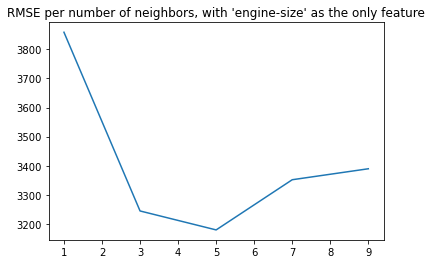

In [26]:
k_values = {}

for i in range(1,11,2):
    k_values[i] = univariate_knn_cross_fold(feature = 'engine-size',df = normalized_cars,target = 'price',k = i)
        
x = list(k_values.keys())
y = list(k_values.values())

plt.title("RMSE per number of neighbors, with 'engine-size' as the only feature")
plt.plot(x,y)

In [27]:
feature_rmse = {}

for col in ['num-of-doors', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']:
    root_mean_squared_error = univariate_knn_cross_fold(df = normalized_cars,feature = col,target = 'price', k = 5)
    feature_rmse[col] = root_mean_squared_error

feature_rmse = pd.Series(feature_rmse)
feature_rmse = feature_rmse.sort_values()
feature_rmse

engine-size          3179.500756
horsepower           3965.815026
curb-weight          4139.620194
city-mpg             4172.737507
highway-mpg          4416.539895
width                4707.336966
length               5207.326031
wheel-base           5719.290972
compression-ratio    6683.751566
stroke               7302.688658
bore                 7585.908002
height               7608.255204
peak-rpm             7640.543271
num-of-cylinders     8334.652419
num-of-doors         8639.692651
dtype: float64

In [28]:
six_best_features_cross_fold = feature_rmse.index.values[0:6]
six_best_features_cross_fold

array(['engine-size', 'horsepower', 'curb-weight', 'city-mpg',
       'highway-mpg', 'width'], dtype=object)

* Testando valores de k com 6 melhores features

In [29]:
six_best_features_cross_fold

array(['engine-size', 'horsepower', 'curb-weight', 'city-mpg',
       'highway-mpg', 'width'], dtype=object)

In [30]:
dict_feature_k_rmse_cross_fold = {}

for f in six_best_features_cross_fold:
    temp_feature_k_dict = {}
    for n_neighbors in range(1,11,2):
        temp_feature_k_dict[n_neighbors] = univariate_knn_cross_fold(df = normalized_cars,feature = f,target = 'price', k = n_neighbors)
    dict_feature_k_rmse_cross_fold[f] =  temp_feature_k_dict 


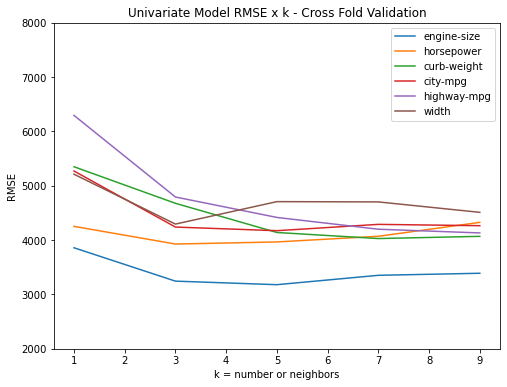

In [31]:
figure = plt.figure(figsize = [8,6])
ax1 = figure.add_subplot(1,1,1)

for key in dict_feature_k_rmse_cross_fold:
    x = range(1,11,2)
    y = list(dict_feature_k_rmse_cross_fold[key].values())
    ax1.plot(x,y, label = key)

ax1.legend()
ax1.set_xlabel('k = number or neighbors')
ax1.set_ylabel('RMSE')
ax1.set_ylim(2000,8000)
ax1.set_title("Univariate Model RMSE x k - Cross Fold Validation")

plt.show()

* Calculating the 6 best features, using the mean for n_neighbors between 1 and 9

In [32]:
avg_rmse_feature = {}

for key in dict_feature_k_rmse_cross_fold:
    avg_rmse = np.average(list(dict_feature_k_rmse_cross_fold[key].values()))
    avg_rmse_feature[key] = avg_rmse

six_best_features_cross_fold = pd.Series(avg_rmse_feature).sort_values()
six_best_features_cross_fold

engine-size    3404.838945
horsepower     4108.193968
city-mpg       4447.322503
curb-weight    4452.357326
width          4685.117193
highway-mpg    4766.727000
dtype: float64

## 4.2. Multivariate Model - Cross Fold Validation

In [33]:
def multivariate_knn_cross_fold(feature,df = normalized_cars,target = 'price',k = 5):   
    model = KNeighborsRegressor(n_neighbors = k)
    k_fold = KFold(n_splits=5, shuffle=True, random_state= rs)
    mses = cross_val_score(model,df[feature],df[[target]],scoring = 'neg_mean_squared_error', cv = k_fold)
    rmses = (np.absolute(mses))**0.5
    avg_rmse = np.mean(rmses)
    return avg_rmse

In [34]:
six_best_features_cross_fold = pd.Series(six_best_features_cross_fold)
number_features_rmse_cross_fold = {}

for i in range(1,7):
    features = six_best_features_cross_fold[0:i].keys().values
    number_features_rmse_cross_fold[i] = multivariate_knn_cross_fold(feature = features, k = 3)

pd.Series(number_features_rmse_cross_fold)

1    3244.618559
2    2930.005982
3    2885.613267
4    2777.594989
5    2786.084591
6    2956.321134
dtype: float64

## 5.1. Hyperparameter Tuning - Cross fold validation

In [35]:
feature_rmse_cross_fold = {}

for i in range(1,5):
    features = six_best_features_cross_fold[0:i].keys().values
    k_per_feature_temp = {}
    for n_neighbors in range(1,26):
        k_per_feature_temp[n_neighbors] = multivariate_knn_cross_fold(feature = features, k = n_neighbors)
    feature_rmse_cross_fold[str(features)] = k_per_feature_temp
    
feature_rmse_cross_fold

{"['engine-size']": {1: 3858.5869848939556,
  2: 3253.0982338214644,
  3: 3244.618559197672,
  4: 3107.8055701172243,
  5: 3179.5007556120813,
  6: 3252.677890298296,
  7: 3351.913411215262,
  8: 3453.4707466024834,
  9: 3389.5750130382403,
  10: 3411.281924990897,
  11: 3465.2722333600846,
  12: 3565.5937260244928,
  13: 3668.4114452219474,
  14: 3788.965399236936,
  15: 3869.3989253881527,
  16: 3929.8693173609818,
  17: 3987.7609971401957,
  18: 4031.51787690573,
  19: 4129.67503348199,
  20: 4224.000311317905,
  21: 4304.8930388027,
  22: 4333.263432032515,
  23: 4385.955334475281,
  24: 4417.826252887882,
  25: 4456.280336089015},
 "['engine-size' 'horsepower']": {1: 3297.1802217275485,
  2: 2844.8506969034343,
  3: 2930.005981681948,
  4: 2964.0620957221763,
  5: 3068.072893566577,
  6: 3148.062653634363,
  7: 3172.090674241893,
  8: 3258.674023340924,
  9: 3349.5290928795102,
  10: 3473.4391585078033,
  11: 3655.933021919476,
  12: 3836.3153486327283,
  13: 3957.347535837478,
  

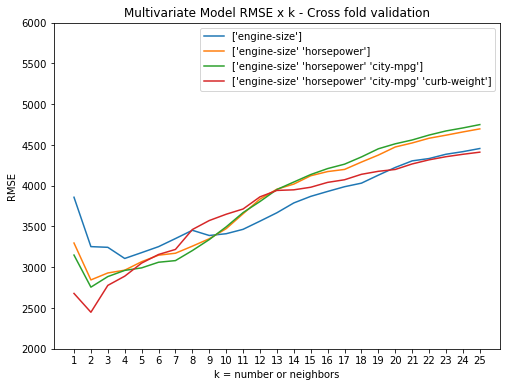

In [36]:
%matplotlib inline
figure3 = plt.figure(figsize = [8,6])
ax3 = figure3.add_subplot(1,1,1)

for key in feature_rmse_cross_fold:
    x = list(feature_rmse_cross_fold[key].keys())
    y = list(feature_rmse_cross_fold[key].values())
    ax3.plot(x,y, label = key)

ax3.legend()
ax3.set_xlabel('k = number or neighbors')
ax3.set_ylabel('RMSE')
ax3.set_ylim(2000,6000)
ax3.set_title("Multivariate Model RMSE x k - Cross fold validation")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

In [47]:
features = six_best_features_cross_fold.keys().values[:4]

multivariate_knn_cross_fold(feature = features, k = 5)

3051.1607452745693